# Plotting System Stats

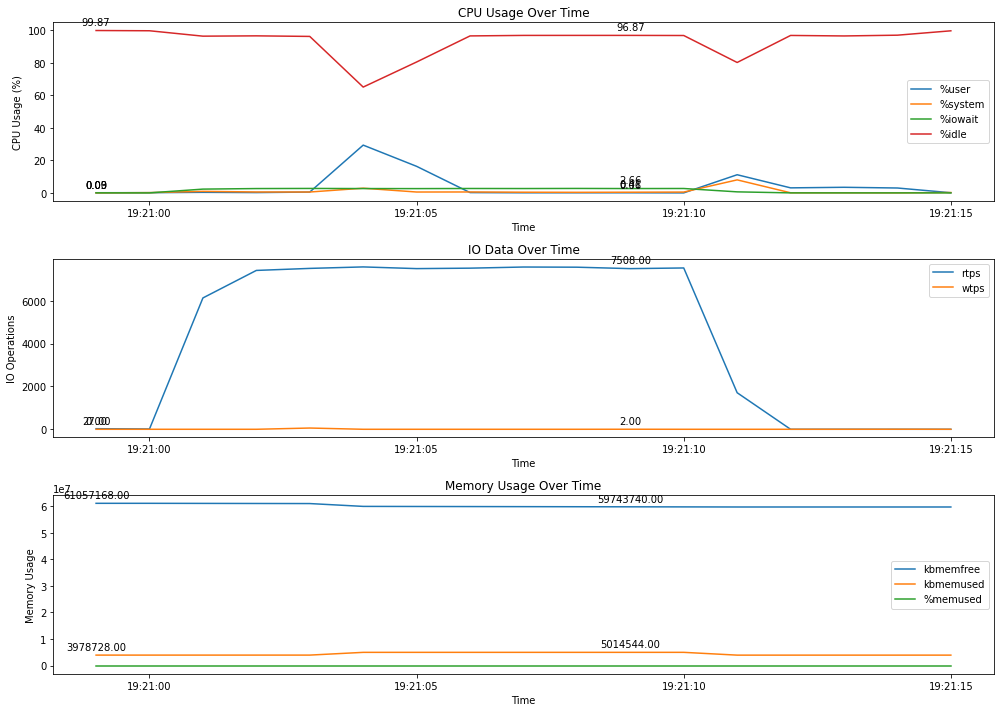

In [6]:
import pandas as pd
import re
import matplotlib.pyplot as plt


def parse_cpu_data(file_path):
    cpu_data = []
    with open(file_path, "r") as file:
        lines = file.readlines()
        for line in lines[3:]:
            parts = line.split()
            if len(parts) == 8:  # Ensure there are 9 columns
                Time, cpu, user, nice, system, iowait, steal, idle = parts
                cpu_data.append(
                    [
                        Time,
                        cpu,
                        float(user),
                        float(nice),
                        float(system),
                        float(iowait),
                        float(steal),
                        float(idle),
                    ]
                )
    cpu_df = pd.DataFrame(
        cpu_data,
        columns=[
            "Time",
            "CPU",
            "%user",
            "%nice",
            "%system",
            "%iowait",
            "%steal",
            "%idle",
        ],
    )
    return cpu_df


def parse_io_data(file_path):
    io_data = []
    with open(file_path, "r") as file:
        lines = file.readlines()
        for line in lines[3:]:  # Skipping the first 3 lines (header information)
            parts = line.split()
            if len(parts) == 8:  # Ensure there are 8 columns
                Time, tps, rtps, wtps, dtps, bread, bwrtn, bdscd = parts
                io_data.append(
                    [
                        Time,
                        float(tps),
                        float(rtps),
                        float(wtps),
                        float(dtps),
                        float(bread),
                        float(bwrtn),
                        float(bdscd),
                    ]
                )
    io_df = pd.DataFrame(
        io_data,
        columns=[
            "Time",
            "tps",
            "rtps",
            "wtps",
            "dtps",
            "bread/s",
            "bwrtn/s",
            "bdscd/s",
        ],
    )
    return io_df


def parse_memory_data(file_path):
    memory_data = []
    with open(file_path, "r") as file:
        lines = file.readlines()
        for line in lines[3:]:  # Skipping the first 3 lines (header information)
            parts = line.split()
            if len(parts) == 12:  # Ensure there are 12 columns
                (
                    Time,
                    kbmemfree,
                    kbavail,
                    kbmemused,
                    memused,
                    kbbuffers,
                    kbcached,
                    kbcommit,
                    commit,
                    kbactive,
                    kbinact,
                    kbdirty,
                ) = parts
                memory_data.append(
                    [
                        Time,
                        float(kbmemfree),
                        float(kbavail),
                        float(kbmemused),
                        float(memused),
                        float(kbbuffers),
                        float(kbcached),
                        float(kbcommit),
                        float(commit),
                        float(kbactive),
                        float(kbinact),
                        float(kbdirty),
                    ]
                )
    memory_df = pd.DataFrame(
        memory_data,
        columns=[
            "Time",
            "kbmemfree",
            "kbavail",
            "kbmemused",
            "%memused",
            "kbbuffers",
            "kbcached",
            "kbcommit",
            "%commit",
            "kbactive",
            "kbinact",
            "kbdirty",
        ],
    )
    return memory_df


cpu_file = "stats/cpu/cpu-stats_2516.txt"
io_file = "stats/io/io-stats_2516.txt"
memory_file = "stats/memory/memory-stats_2516.txt"

cpu_df = parse_cpu_data(cpu_file)
io_df = parse_io_data(io_file)
memory_df = parse_memory_data(memory_file)

# Convert 'Time' columns to datetime for easier merging and plotting
cpu_df["Time"] = pd.to_datetime(cpu_df["Time"], format="%H:%M:%S")
io_df["Time"] = pd.to_datetime(io_df["Time"], format="%H:%M:%S")
memory_df["Time"] = pd.to_datetime(memory_df["Time"], format="%H:%M:%S")

# Merge dataframes on 'Time'
merged_df = cpu_df.merge(io_df, on="Time", how="outer").merge(
    memory_df, on="Time", how="outer"
)

# Plot the data
plt.figure(figsize=(14, 10))


# CPU Usage Plot
plt.subplot(3, 1, 1)
plt.plot(cpu_df["Time"], cpu_df["%user"], label="%user")
plt.plot(cpu_df["Time"], cpu_df["%system"], label="%system")
plt.plot(cpu_df["Time"], cpu_df["%iowait"], label="%iowait")
plt.plot(cpu_df["Time"], cpu_df["%idle"], label="%idle")
for i in range(0, len(cpu_df), 10):
    plt.annotate(
        f"{cpu_df['%user'][i]:.2f}",
        (cpu_df["Time"][i], cpu_df["%user"][i]),
        textcoords="offset points",
        xytext=(0, 5),
        ha="center",
    )
    plt.annotate(
        f"{cpu_df['%system'][i]:.2f}",
        (cpu_df["Time"][i], cpu_df["%system"][i]),
        textcoords="offset points",
        xytext=(0, 5),
        ha="center",
    )
    plt.annotate(
        f"{cpu_df['%iowait'][i]:.2f}",
        (cpu_df["Time"][i], cpu_df["%iowait"][i]),
        textcoords="offset points",
        xytext=(0, 5),
        ha="center",
    )
    plt.annotate(
        f"{cpu_df['%idle'][i]:.2f}",
        (cpu_df["Time"][i], cpu_df["%idle"][i]),
        textcoords="offset points",
        xytext=(0, 5),
        ha="center",
    )
plt.xlabel("Time")
plt.ylabel("CPU Usage (%)")
plt.title("CPU Usage Over Time")
plt.legend()

# IO Data Plot
plt.subplot(3, 1, 2)
plt.plot(io_df["Time"], io_df["rtps"], label="rtps")
plt.plot(io_df["Time"], io_df["wtps"], label="wtps")
for i in range(0, len(io_df), 10):
    plt.annotate(
        f"{io_df['rtps'][i]:.2f}",
        (io_df["Time"][i], io_df["rtps"][i]),
        textcoords="offset points",
        xytext=(0, 5),
        ha="center",
    )
    plt.annotate(
        f"{io_df['wtps'][i]:.2f}",
        (io_df["Time"][i], io_df["wtps"][i]),
        textcoords="offset points",
        xytext=(0, 5),
        ha="center",
    )

plt.xlabel("Time")
plt.ylabel("IO Operations")
plt.title("IO Data Over Time")
plt.legend()

# Memory Usage Plot
plt.subplot(3, 1, 3)
plt.plot(memory_df["Time"], memory_df["kbmemfree"], label="kbmemfree")
plt.plot(memory_df["Time"], memory_df["kbmemused"], label="kbmemused")
plt.plot(memory_df["Time"], memory_df["%memused"], label="%memused")
for i in range(0, len(memory_df), 10):
    plt.annotate(
        f"{memory_df['kbmemfree'][i]:.2f}",
        (memory_df["Time"][i], memory_df["kbmemfree"][i]),
        textcoords="offset points",
        xytext=(0, 5),
        ha="center",
    )
    plt.annotate(
        f"{memory_df['kbmemused'][i]:.2f}",
        (memory_df["Time"][i], memory_df["kbmemused"][i]),
        textcoords="offset points",
        xytext=(0, 5),
        ha="center",
    )
    # plt.annotate(
    #     f"{memory_df['%memused'][i]:.2f}",
    #     (memory_df["Time"][i], memory_df["%memused"][i]),
    #     textcoords="offset points",
    #     xytext=(0, 5),
    #     ha="center",
    # )

plt.xlabel("Time")
plt.ylabel("Memory Usage")
plt.title("Memory Usage Over Time")
plt.legend()

plt.tight_layout()
plt.show()

# Checking current directory
and changing current directory

In [67]:
import os 

current_directory = os.getcwd()
print(current_directory)

os.chdir("/home/ubuntu/projects/vault-76/entrance/src/benchmark/")
current_directory = os.getcwd()
print(f"Changed directory to {current_directory}")

/home/ubuntu/projects/vault-76/entrance/src/benchmark
Changed directory to /home/ubuntu/projects/vault-76/entrance/src/benchmark


# Benchmarking lookup process

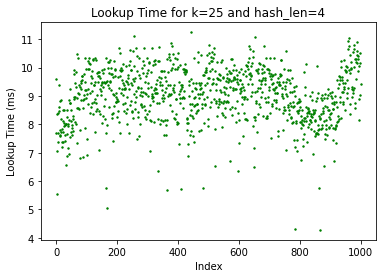

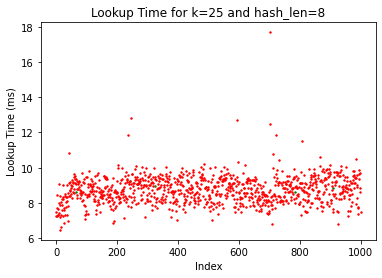

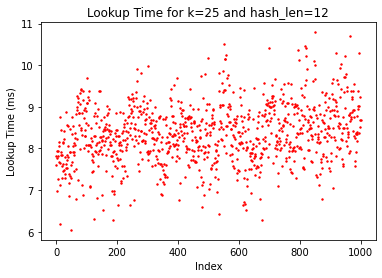

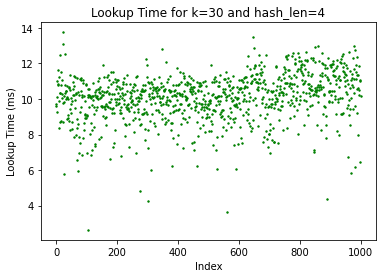

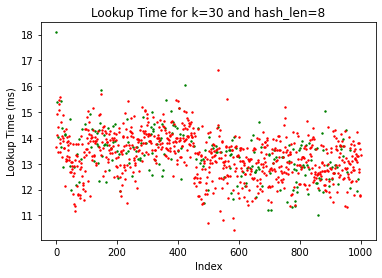

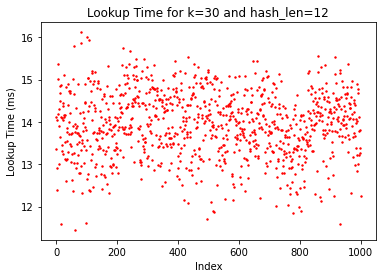

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

def strip_last(lookup_time):
    if lookup_time[-2:] == "ms":
        return lookup_time[:-2]
    elif lookup_time[-2:] == "µs":
        return float(lookup_time[:-2]) / 1000 

for k in [25, 30]:
    for hash_len in [4, 8, 12]:
        csv_file = f"lookup_csv/lookup_{k}_{hash_len}.csv"
        
        df = pd.read_csv(csv_file)
        
        df["LookupTime(ms)"] = df["LookupTime(ms)"].apply(strip_last)
        df["LookupTime(ms)"] = df["LookupTime(ms)"].astype(float)
        
        found_true = df[df["IsExist"] == True]
        found_false = df[df["IsExist"] == False]
        
        fig, ax = plt.subplots()
        plt.scatter(found_true.index, found_true["LookupTime(ms)"], label=f'', s=2, color="green")
        plt.scatter(found_false.index, found_false["LookupTime(ms)"], label=f'', s=2, color="red")
        
#         avg_lookup_time = df["LookupTime(ms)"].mean()
#         plt.axhline(y=avg_lookup_time, color="blue", linestyle="-", linewidth=1, label="average")
#         plt.text(0.5, avg_lookup_time, f'{avg_lookup_time:.2f} ms', color='black', 
#                  verticalalignment='bottom', horizontalalignment='center', transform=ax.get_yaxis_transform())
        
#         plt.legend()
        
        plt.title(f'Lookup Time for k={k} and hash_len={hash_len}')
        plt.xlabel('Index')
        plt.ylabel('Lookup Time (ms)')
        
        plt.savefig(f"lookup_plot/lookup_{k}_{hash_len}_plot.svg")
